In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy import signal as sig
import math
from skimage.util import img_as_ubyte, img_as_float64
from skimage.color import rgb2gray
from skimage.color import rgb2hsv
import matplotlib.pyplot as plt
from skimage.io import imread
import warnings
from PIL import ImageFilter
warnings.filterwarnings('ignore')
import  import_ipynb
import func_expos_fusion as fun  ## from notebook
#import func_expos_fusion_adriatic as fn ### from notebook
import WBsRGB as wb_srgb    ### from notebook
from functions import *    ### from notebook
#from functions_adriatic import  *
from uiqm import *         ### from notebook

importing Jupyter notebook from func_expos_fusion.ipynb
importing Jupyter notebook from WBsRGB.ipynb
importing Jupyter notebook from functions.ipynb
importing Jupyter notebook from uiqm.ipynb


In [2]:
wbModel = wb_srgb.WBsRGB(gamut_mapping=2,upgraded=1)

### Enhance Image

In [3]:
def enhance(img):
    '''dehazing of degreded image''' 
    deh = dehaze(img)
    deh = cv2.normalize(deh, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
    deh=deh.astype(np.uint8)
    wb = wbModel.correctImage(deh)
    #wb = enhance_contrast(wb)
    
    ''' Color Correction of degreded image'''
    cc = simplest_cb(img,3)
    
    
    '''generating weight maps of dehazed and color corrected image'''
    l = weight_maps(wb,cc)
    
    '''Multi-Scale fusion '''
    fused = fusion(inputs=l[0], weights=l[1], gaussians=l[2])
    
    
    '''contrast enhancement '''
    fused = fun.exposer_fusion(fused)
    return fused

Reading Input images

In [4]:
from PIL import Image
import glob
img_path='C:/Users/adanent/Documents/1__WP4_OD_Adriatic/1_Image-Enhancement-Optical image-ADRIATIC/1_Underwater_UWIPP/input_images_URPC/*.*'
#img_path='./input_images2/*.*'
image_list = []
for filename in glob.glob(img_path):
    im=Image.open(filename)
    im=np.array(im) 
    #m.show()
    image_list.append(im)

### Storing output images in output_images folder

In [6]:
in_dir ='C:/Users/adanent/Documents/1__WP4_OD_Adriatic/1_Image-Enhancement-Optical image-ADRIATIC/1_Underwater_UWIPP/input_images_URPC/'
out_dir ='C:/Users/adanent/Documents/1__WP4_OD_Adriatic/1_Image-Enhancement-Optical image-ADRIATIC/1_Underwater_UWIPP/output_images_URPC/'

imgfiles = []
valid_images = (".jpg", ".jpeg", ".PNG")
for f in os.listdir(in_dir):
    if f.lower().endswith(valid_images):
        imgfiles.append(os.path.join(in_dir, f))
for in_img in imgfiles:
    print("processing image: " + in_img + "\n")
    filename, file_extension = os.path.splitext(in_img)  # get file parts
    I = cv2.imread(in_img)  # read the image
    outImg = enhance(I)
    cv2.imwrite(out_dir + '/' + os.path.basename(filename) + file_extension, outImg )

processing image: C:/Users/adanent/Documents/1__WP4_OD_Adriatic/1_Image-Enhancement-Optical image-ADRIATIC/1_Underwater_UWIPP/input_images_URPC/119_jpg.rf.10407e56584812e1777e90bafde55b27.jpg

processing image: C:/Users/adanent/Documents/1__WP4_OD_Adriatic/1_Image-Enhancement-Optical image-ADRIATIC/1_Underwater_UWIPP/input_images_URPC/138_jpg.rf.4ebe1b1016883ffa4cd21e37d5cde415.jpg

processing image: C:/Users/adanent/Documents/1__WP4_OD_Adriatic/1_Image-Enhancement-Optical image-ADRIATIC/1_Underwater_UWIPP/input_images_URPC/200_jpg.rf.f2a00f01d6e5041e9eb9fdbfdec1d138.jpg

processing image: C:/Users/adanent/Documents/1__WP4_OD_Adriatic/1_Image-Enhancement-Optical image-ADRIATIC/1_Underwater_UWIPP/input_images_URPC/214_jpg.rf.94c889224b9101c1cac15b22f232b010.jpg

processing image: C:/Users/adanent/Documents/1__WP4_OD_Adriatic/1_Image-Enhancement-Optical image-ADRIATIC/1_Underwater_UWIPP/input_images_URPC/2432_jpg.rf.86d8263761378ef7a2bbed2b5f08c5e4.jpg

processing image: C:/Users/adanent

## Show enhanced Images

uciqe:  0.5705798864364624
UIQM:  2.193286052213457


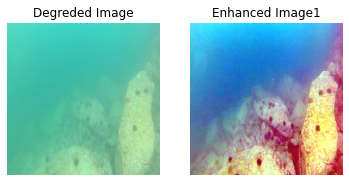

uciqe:  0.6065624356269836
UIQM:  2.7353148878582463


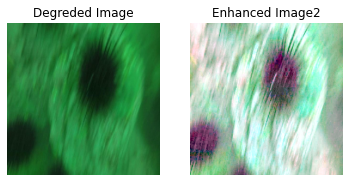

uciqe:  0.568276584148407
UIQM:  2.720697558087422


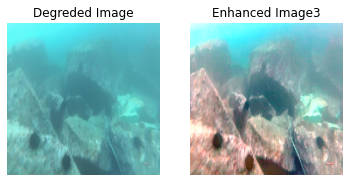

uciqe:  0.6073094606399536
UIQM:  2.653246436982805


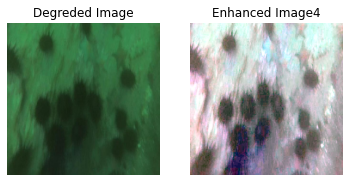

uciqe:  0.6037773489952087
UIQM:  2.669752905282683


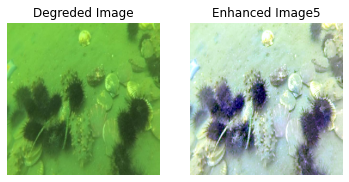

uciqe:  0.5758270621299744
UIQM:  3.0302414022348443


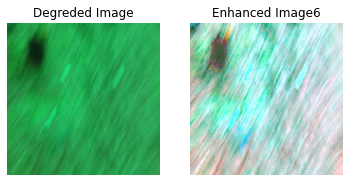

uciqe:  0.5912700891494751
UIQM:  2.89354930660308


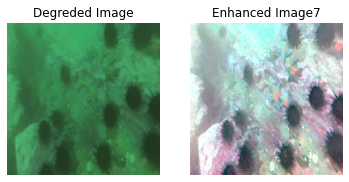

uciqe:  0.5645326375961304
UIQM:  2.347869468318504


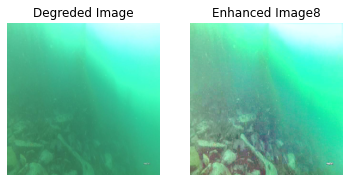

In [7]:
temp=[]
t=[]
uism=[]

plt.rc('figure', figsize=(10, 10))
i=0

import time
for image in image_list:
    i=i+1
    
    image = cv2.resize(image, (256, 256),  
               interpolation = cv2.INTER_NEAREST)
   
    
    '''call the enhanced algorithm'''
    enhanced_data = enhance(image)
    
    '''contrast enhancement of fused image'''
    
    enhanced_data = fun.exposer_fusion(enhanced_data)
    
    end = time.time()

    
    print("uciqe: ",UCIQE(enhanced_data))
    #temp.append(UCIQE(enhanced_data))
    print("UIQM: ",getUIQM(enhanced_data))
    #t.append(getUIQM(enhanced_data))
    #print("_uiconm: ",_uiconm(enhanced_data))
    #usim.append(_uiconm(enhanced_data))
    
    l=[image,enhanced_data]
    plt.figure()

    # Display results
    plt.subplot(1, 2, 1)
    plt.imshow(l[0])
    plt.title('Degreded Image')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(l[1])
    plt.title('Enhanced Image'+str(i))
    plt.axis('off')

    plt.show()

storing output images in output_images folder